In [2]:
from sklearn import decomposition
from run_preprocessing import load_data
from display import Display

import numpy as np
import matplotlib.pyplot as plt

In [87]:
eye_dataset_path= './dataset/processed_eye_motion_dataset.pickle'
fps = 10
n_components = 7

In [104]:
display = Display(180, 320)

In [105]:
n_row, n_col = 4, n_components
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2.*3 * n_col, 1.5*3 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.01, 0.99, 0.99, 0.05, 0.)

In [106]:
eye_dataset = load_data(eye_dataset_path, -1)
print('[INFO] Total number of clips: {}'.format(len(eye_dataset)))

[INFO] Total number of clips: 573


In [111]:
landmark_list = []
for ed in eye_dataset:
    for clip_info in ed['clip_info']:
        for clip_landmarks in clip_info['landmarks']:
            for landmarks in clip_landmarks:
                landmark_list.append(landmarks)

landmark_array = np.array(landmark_list)
n_samples, n_features = landmark_array.shape
print('[INFO] n_samples:{}, n_features:{}'.format(n_samples, n_features))
print('[INFO] Estimated running time: {:0.2f} hrs'.format(n_samples/fps/60/60))

[INFO] n_samples:74302, n_features:50
[INFO] Estimated running time: 2.06 hrs


In [101]:
# without center dot
data = landmark_array[:, :-2]
print('[INFO] Sample landmark array: \n{}'.format(data[0]))

[INFO] Sample landmark array: 
[102  94 211  96  86 102  99  93 113  91 128 101 113 104  99 105 193 102
 207  94 223  94 236 105 222 109 207 105  62  82  73  66  91  56 112  54
 131  61 187  59 207  53 230  56 249  67 262  85]


In [132]:
estimator = decomposition.PCA(n_components, svd_solver='randomized', whiten=True)
estimator.fit(data)
var_ratio = estimator.explained_variance_ratio_
np.sum(var_ratio[3:])

0.1363240082377007

In [84]:
mean_expression = np.array([0]*n_components)
m_0 = np.diag([4]*n_components)
m_1 = np.diag([2]*n_components)
m_2 = np.diag([-2]*n_components)
m_3 = np.diag([-4]*n_components)
pca_subspace = np.concatenate((m_0, m_1, m_2, m_3), axis=0)
pca_subspace

array([[ 4,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  4],
       [ 2,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  2],
       [-2,  0,  0,  0,  0,  0,  0],
       [ 0, -2,  0,  0,  0,  0,  0],
       [ 0,  0, -2,  0,  0,  0,  0],
       [ 0,  0,  0, -2,  0,  0,  0],
       [ 0,  0,  0,  0, -2,  0,  0],
       [ 0,  0,  0,  0,  0, -2,  0],
       [ 0,  0,  0,  0,  0,  0, -2],
       [-4,  0,  0,  0,  0,  0,  0],
       [ 0, -4,  0,  0,  0,  0,  0],
       [ 0,  0, -4,  0,  0,  0,  0],
       [ 0,  0,  0, -4,  0,  0,  0],
       [ 0,  0,  0,  0, -4,  0,  0],
       [ 0,  0,  0,  0,  0, -4,  0],
 

In [85]:
subspace = estimator.inverse_transform(pca_subspace)
subspace.shape

(28, 48)

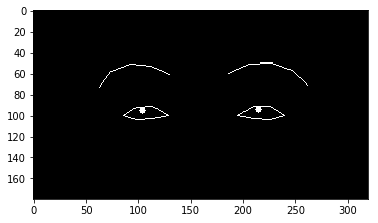

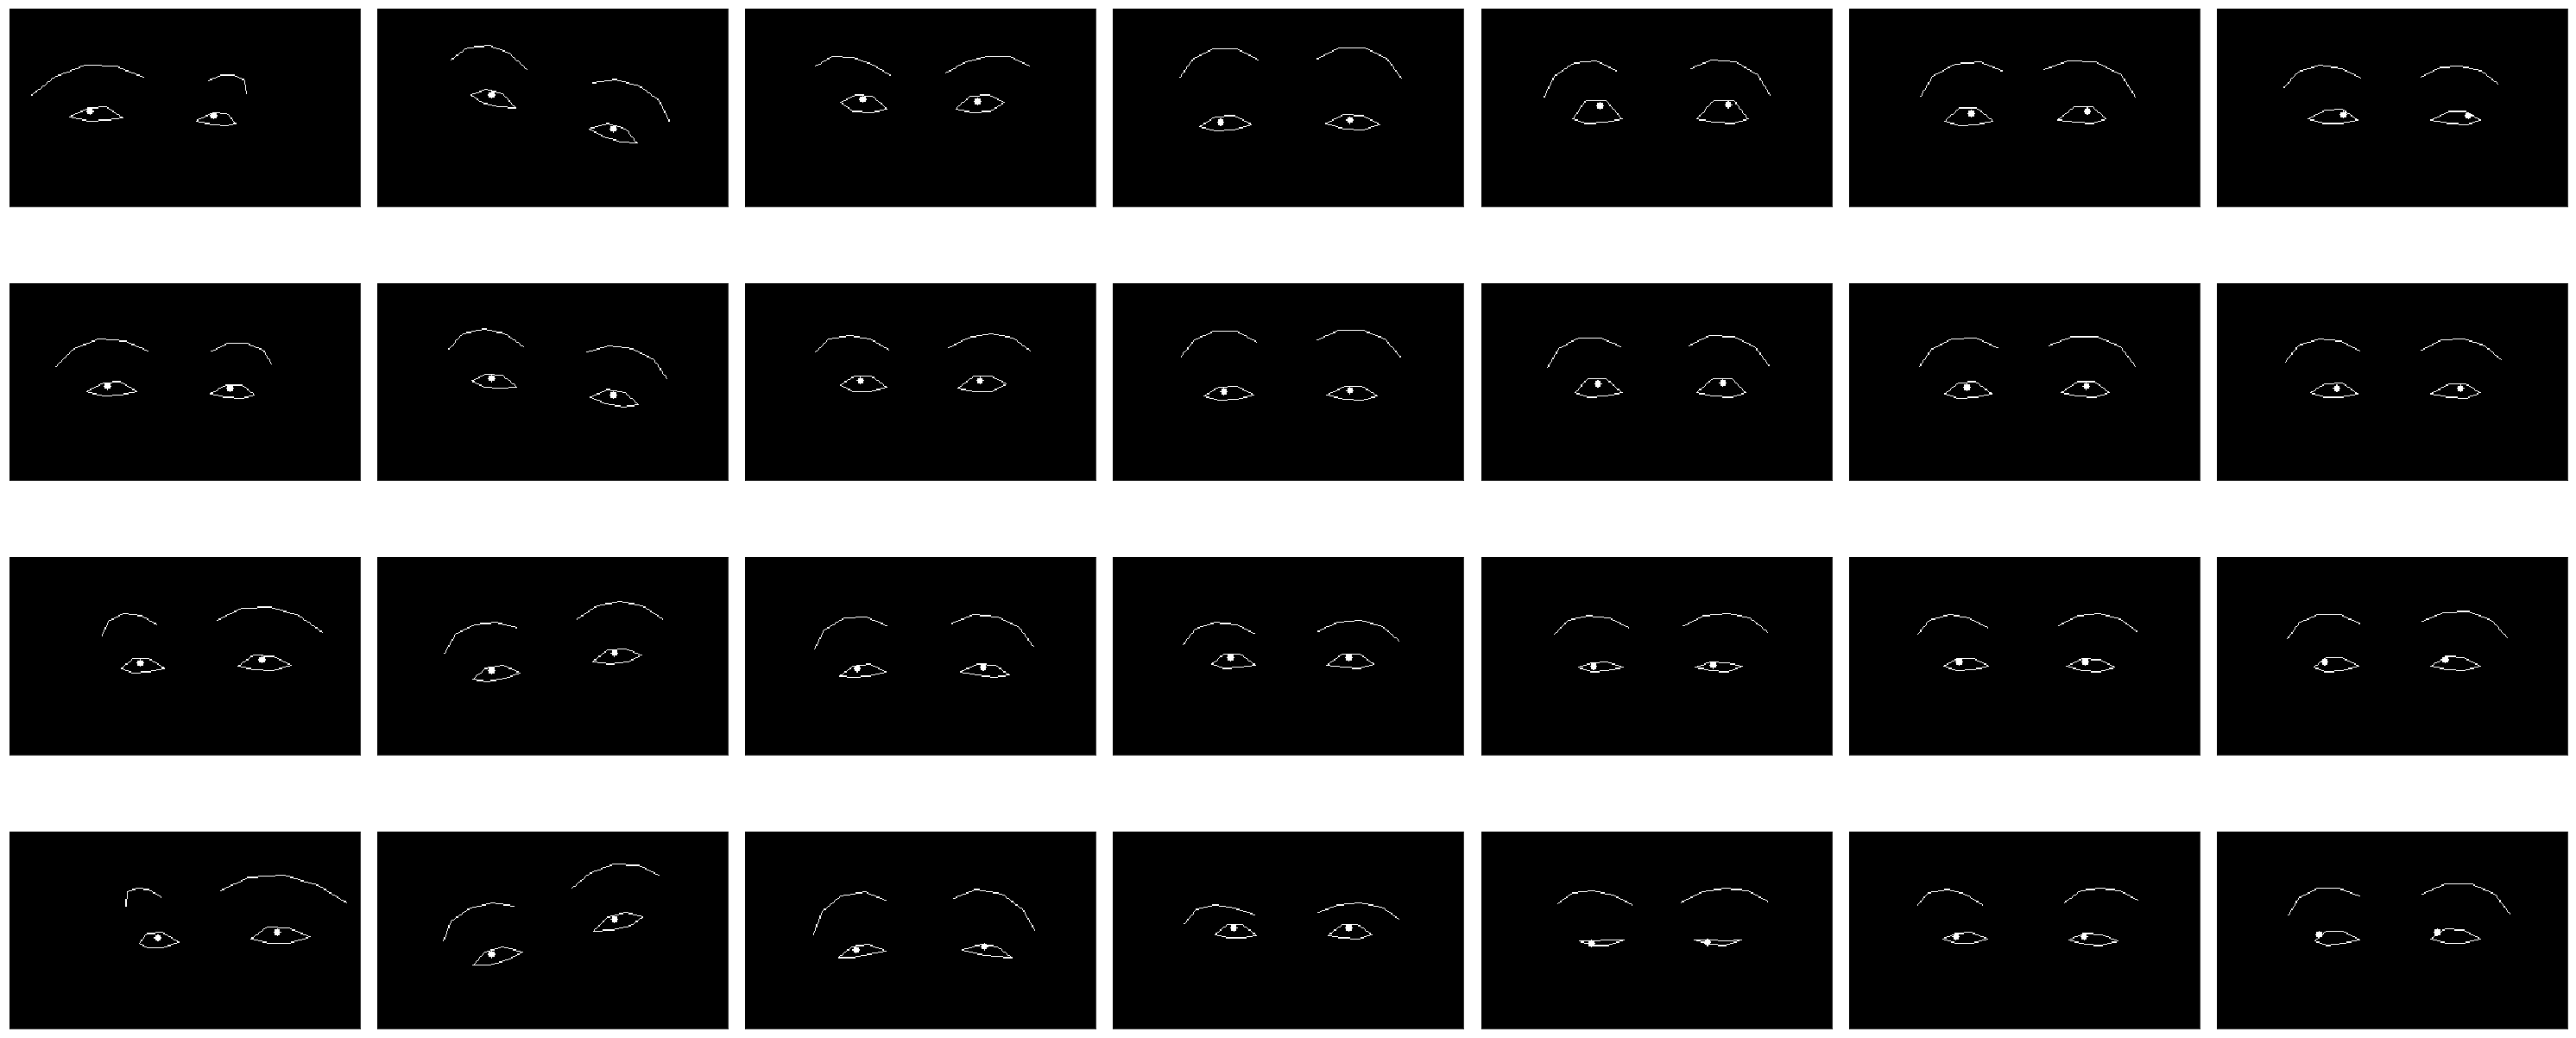

In [86]:
# mean expression
mean = estimator.inverse_transform(mean_expression)
mean = [int(o) for o in list(mean)]
# pca subspace expression
images = []
for space in subspace:
    inversed = [int(s) for s in space]
    img = display.draw_frame(inversed, False)
    images.append(img)

plt.imshow(display.draw_frame(mean, False))
plot_gallery('PCA_subspace', images)
plt.show()

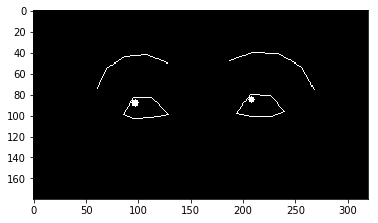

In [131]:
# sample = [-0.07821591236234299, 0.20747348878496788, -0.8870684604534096, -0.34685784939808373, -0.8311870356084051, -1.0195852524805507, -1.2879923222780936]
sample = [0,0,1,1,3,1,-4]
sample = estimator.inverse_transform(np.array(sample))
sample = [int(s) for s in list(sample)]

plt.imshow(display.draw_frame(sample, False))
plt.show()